Now use the finite difference method presented in class to solve the same problem using a
finite eigensystem. Compare the eigenfunctions to your analytic method and test how its
accuracy varies with N. Demonstrate how a central temperature excess (use a Gaussian
with a standard deviation of about one pixel) evolves over time. Feel free to use an altered
version of the StringProb class in the Jupyter notebook for this lecture. However, you will
need to account for the boundary conditions differently. To do so, use a central difference
approximation to the derivative at the first node, and use this to alter the first and last finite
difference equations.

In [59]:
# The matrix M was found to be a sparse matrix with a main diagonal of 0, and upper diagonal of positive 1,
# and a lower diagonal of -1. We create the matrix M as follows.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg
import scipy.sparse as sparse
import scipy.sparse.linalg as linalgs
from matplotlib import animation
from IPython.display import HTML
class ThermoRod():
    def length(length, x = None):
        #Returns the length of the rod.
        Length = 10.
        return(Length)
    def alpha(alpha, x = None):
        Alpha = 5.0
        return(Alpha)
    def __init__(self, N = 221, **kwargs):
        self.kwargs = kwargs
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        Diagonals = [np.zeros(N)-2, np.zeros(N-1) + 1, np.zeros(N-1) + 1]
        self.M = diags(diagonals = Diagonals, offsets = [0, 1, -1], shape=(N,N)).toarray()
    def eig(self):
        vals, vecs = linalg.eig(self.M)
        isort = np.argsort(vals)
        self.evals = vals[isort]
        self.evecs = vecs[:, isort]
    def set_coeffs(self, a=None, b=None):
        self.a = a
        self.b = b
    def fit_coeffs(self, d=None):
        """Fit coefficients for eigenvectors for a set of displacements"""
        (u, w, vt) = linalg.svd(self.evecs)
        inz = np.where(w > 1.e-15)[0]
        invw = np.zeros(len(w))
        invw[inz] = 1. / w[inz] 
        einv = vt.transpose().dot(np.diag(invw)).dot(u.transpose())
        return(einv.dot(d)) 
    def frame(self, i):
        period =  2. * np.pi / np.sqrt(self.evals[0])
        t = np.float64(i) / np.float64(nframes) * period * 4
        x = self.x
        coeffs = (self.a * np.cos(np.sqrt(self.evals) * t) +
                  self.b * np.sin(np.sqrt(self.evals) * t))
        y = self.evecs.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)

In [72]:
Rd = ThermoRod()
Rd.eig()
print(Rd.M)

[[-2.  1.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  1. -2.]]


In [73]:
print(Rd.evecs[0:30])

[[ 0.00134314  0.00268601 -0.00402834 ...,  0.00402834 -0.00268601
  -0.00134314]
 [-0.00268601 -0.00536987  0.00804942 ...,  0.00804942 -0.00536987
  -0.00268601]
 [ 0.00402834  0.00804942 -0.012056   ...,  0.012056   -0.00804942
  -0.00402834]
 ..., 
 [-0.03663271 -0.06758881  0.08807133 ...,  0.08807133 -0.06758881
  -0.03663271]
 [ 0.03786812  0.06944755 -0.08949397 ...,  0.08949397 -0.06944755
  -0.03786812]
 [-0.03909594 -0.07125066  0.09075533 ...,  0.09075533 -0.07125066
  -0.03909594]]


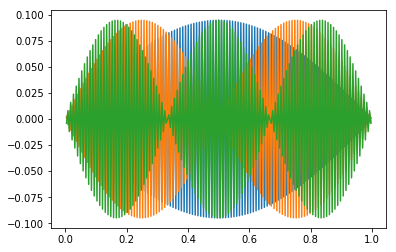

In [74]:
# Comparing the code's graph to the expected solutions indicates that the V(x) solutions are sinusoidal.
for i in np.arange(3):
    plt.plot(Rd.x, Rd.evecs[:, i])

Now alter the thermal diffusivity coefficient α to be a function of position. Try putting a
“barrier” of low diffusivity somewhere (not right at the location of the Gaussian), and see
what happens. Try some other pattern you invent too.

[[-2.  1.  0. ...,  0.  0.  0.]
 [ 1. -2.  1. ...,  0.  0.  0.]
 [ 0.  1. -2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -2.  1.  0.]
 [ 0.  0.  0. ...,  1. -2.  1.]
 [ 0.  0.  0. ...,  0.  1. -2.]]
[[ 0.00134314  0.00268601 -0.00402834 ...,  0.00402834 -0.00268601
  -0.00134314]
 [-0.00268601 -0.00536987  0.00804942 ...,  0.00804942 -0.00536987
  -0.00268601]
 [ 0.00402834  0.00804942 -0.012056   ...,  0.012056   -0.00804942
  -0.00402834]
 ..., 
 [-0.03663271 -0.06758881  0.08807133 ...,  0.08807133 -0.06758881
  -0.03663271]
 [ 0.03786812  0.06944755 -0.08949397 ...,  0.08949397 -0.06944755
  -0.03786812]
 [-0.03909594 -0.07125066  0.09075533 ...,  0.09075533 -0.07125066
  -0.03909594]]


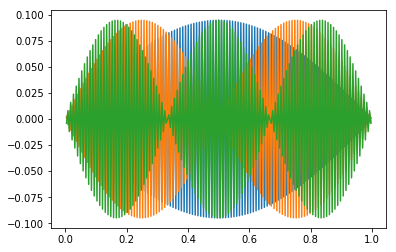

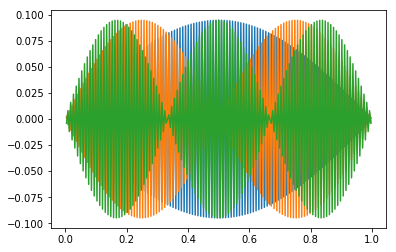

In [88]:
# To put a barrier of low diffusivity, we simply take certain rows and decrease them by an arbitrary factor (say 0.2)
class LowThermoRod():
    def length(length, x = None):
        #Returns the length of the rod.
        Length = 10.
        return(Length)
    def alpha(alpha, x = None):
        Alpha = 5.0
        return(Alpha)
    def __init__(self, N = 221, **kwargs):
        self.kwargs = kwargs
        self.N = N
        self.h = 1. / (np.float64(N) + 1.)
        self.x = (np.arange(self.N, dtype=np.float64) + 1.) * self.h
        Diagonals = [np.zeros(N)-2, np.zeros(N-1) + 1, np.zeros(N-1) + 1]
        self.M = diags(diagonals = Diagonals, offsets = [0, 1, -1], shape=(N,N)).toarray()
    def eig(self):
        vals, vecs = linalg.eig(self.M)
        isort = np.argsort(vals)
        self.evals = vals[isort]
        self.evecs = vecs[:, isort]
    def set_coeffs(self, a=None, b=None):
        self.a = a
        self.b = b
    def fit_coeffs(self, d=None):
        """Fit coefficients for eigenvectors for a set of displacements"""
        (u, w, vt) = linalg.svd(self.evecs)
        inz = np.where(w > 1.e-15)[0]
        invw = np.zeros(len(w))
        invw[inz] = 1. / w[inz] 
        einv = vt.transpose().dot(np.diag(invw)).dot(u.transpose())
        return(einv.dot(d)) 
    def frame(self, i):
        period =  2. * np.pi / np.sqrt(self.evals[0])
        t = np.float64(i) / np.float64(nframes) * period * 4
        x = self.x
        coeffs = (self.a * np.cos(np.sqrt(self.evals) * t) +
                  self.b * np.sin(np.sqrt(self.evals) * t))
        y = self.evecs.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)
Lrd = ThermoRod()
Lrd.eig()
Min = 30
Max = 151
for x in np.linspace(Min, Max, Max-Min+1):
    Lrd.M[int(x)] = Lrd.M[int(x)]*0.01
print(Lrd.M)
print(Lrd.evecs[0:30])
for i in np.arange(3):
    plt.plot(Lrd.x, Lrd.evecs[:, i])
plt.show()
for i in np.arange(3):
    plt.plot(Rd.x, Rd.evecs[:, i])
plt.show()
# No noticable different is observed. This may be a coding or calculation error, however.